# Plot average images

In [1]:
import sys, os
sys.path.append('../')

import logging
import numpy as np
import matplotlib.pyplot as plt

from simulation.units import *
from simulation.population_sim import SubhaloSimulator

logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

## Load data

In [2]:
# x = np.load("../data/samples/x_train.npz")
# np.save("../data/samples/x_train.npy", x['arr_0'])
# del x

In [3]:
theta = np.load("../data/samples/theta_train.npy")
x = np.load("../data/samples/x_train.npy", mmap_mode="c")
y = np.load("../data/samples/y_train.npy")
t_xz = np.load("../data/samples/t_xz_train.npy")
r_xz = np.load("../data/samples/r_xz_train.npy")
n_subs = np.load("../data/samples/n_subs_train.npy")
m_subs = np.load("../data/samples/m_subs_train.npy")

## Calculate averages

In [4]:
avg_x_prior = np.mean(x[y==1], axis=0)
std_x_prior = np.std(x[y==1], axis=0)

In [5]:
alpha_boundaries = (0., 7., 13., 100000.)
beta_boundaries = (-1000.,-2.2,-1.6,-1.0)

avg_x_theta = np.empty((3,3,64,64), dtype=x.dtype)
std_x_theta = np.empty((3,3,64,64), dtype=x.dtype)

for i, (alpha_min, alpha_max) in enumerate(zip(alpha_boundaries[:-1], alpha_boundaries[1:])):
    for j, (beta_min, beta_max) in enumerate(zip(beta_boundaries[:-1], beta_boundaries[1:])):
        cut = (y == 0) * (theta[:,0] >= alpha_min) * (theta[:,0] < alpha_max) * (theta[:,1] >= beta_min) * (theta[:,1] < beta_max)
        avg_x_theta[i,j] = np.mean(x[cut], axis=0)
        std_x_theta[i,j] = np.std(x[cut], axis=0)

In [6]:
avg_x_theta_check = np.empty((3,3,64,64), dtype=x.dtype)
std_x_theta_check = np.empty((3,3,64,64), dtype=x.dtype)

for i, (alpha_min, alpha_max) in enumerate(zip(alpha_boundaries[:-1], alpha_boundaries[1:])):
    for j, (beta_min, beta_max) in enumerate(zip(beta_boundaries[:-1], beta_boundaries[1:])):
        cut = (y == 1) * (theta[:,0] >= alpha_min) * (theta[:,0] < alpha_max) * (theta[:,1] >= beta_min) * (theta[:,1] < beta_max)
        avg_x_theta_check[i,j] = np.mean(x[cut], axis=0)
        std_x_theta_check[i,j] = np.std(x[cut], axis=0)

In [7]:
alpha_descr = [r"$\alpha < 7$", r"$7 < \alpha < 13$", r"$13 < \alpha$"]
beta_descr = [r"$\beta < -2.2$", r"$-2.2 < \beta < -1.6$", r"$-1.6 < \beta$"]

## Average image from prior

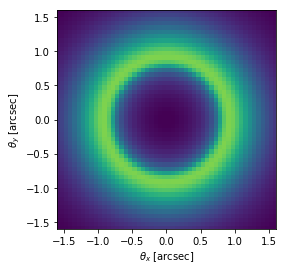

In [8]:
plt.figure(figsize=(4,4))
        
plt.imshow(
    np.log10(avg_x_prior),
    vmin=2.25,
    vmax=3.05,
    cmap='viridis',
    extent=(-2.,2.,-2.,2.),
    origin="lower"
)

plt.xlim(-1.6,1.6)
plt.ylim(-1.6,1.6)

plt.xlabel(r"$\theta_x$ [arcsec]")
plt.ylabel(r"$\theta_y$ [arcsec]")

plt.tight_layout()
plt.savefig("../figures/average_image_prior.pdf")

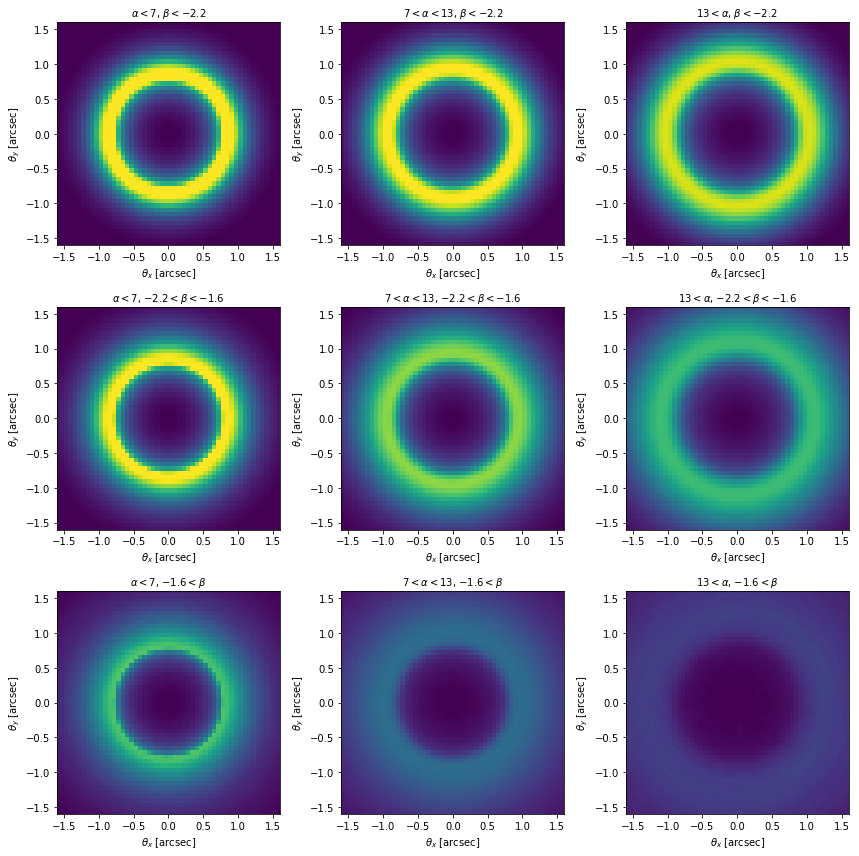

In [9]:
plt.figure(figsize=(12,12))

for i in range(3):
    for j in range(3):
        ax = plt.subplot(3, 3, j*3 + i + 1)
        
        plt.imshow(
            np.log10(avg_x_theta[i,j]),
            vmin=2.25,
            vmax=3.05,
            cmap='viridis',
            extent=(-2.,2.,-2.,2.),
            origin="lower"
        )
    
        plt.xlim(-1.6,1.6)
        plt.ylim(-1.6,1.6)
    
        plt.title(alpha_descr[i] + ", " + beta_descr[j],fontsize=10)
        plt.xlabel(r"$\theta_x$ [arcsec]")
        plt.ylabel(r"$\theta_y$ [arcsec]")
    
plt.tight_layout()
plt.savefig("../figures/average_image_theta.pdf")

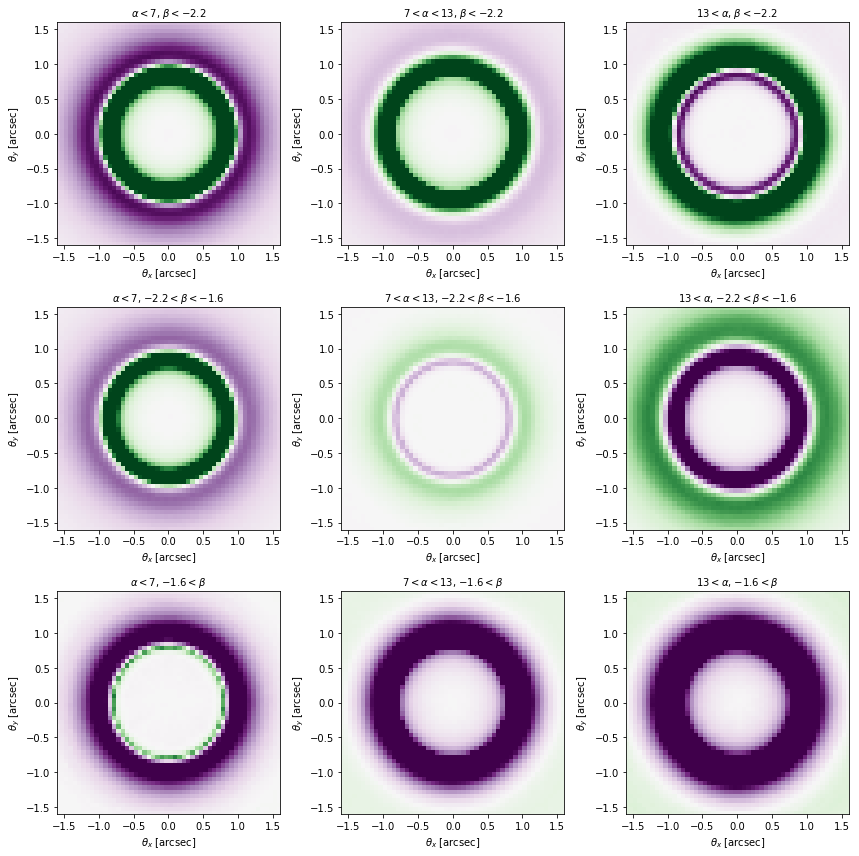

In [10]:
plt.figure(figsize=(12,12))

for i in range(3):
    for j in range(3):
        ax = plt.subplot(3, 3, j*3 + i + 1)
        
        plt.imshow(
            avg_x_theta[i,j]-avg_x_prior,
            vmin=-200,
            vmax=200,
            cmap='PRGn',
            extent=(-2.,2.,-2.,2.),
            origin="lower"
        )
    
        plt.xlim(-1.6,1.6)
        plt.ylim(-1.6,1.6)
    
        plt.title(alpha_descr[i] + ", " + beta_descr[j],fontsize=10)
        plt.xlabel(r"$\theta_x$ [arcsec]")
        plt.ylabel(r"$\theta_y$ [arcsec]")
    
plt.tight_layout()
plt.savefig("../figures/average_image_theta_minus_prior.pdf")

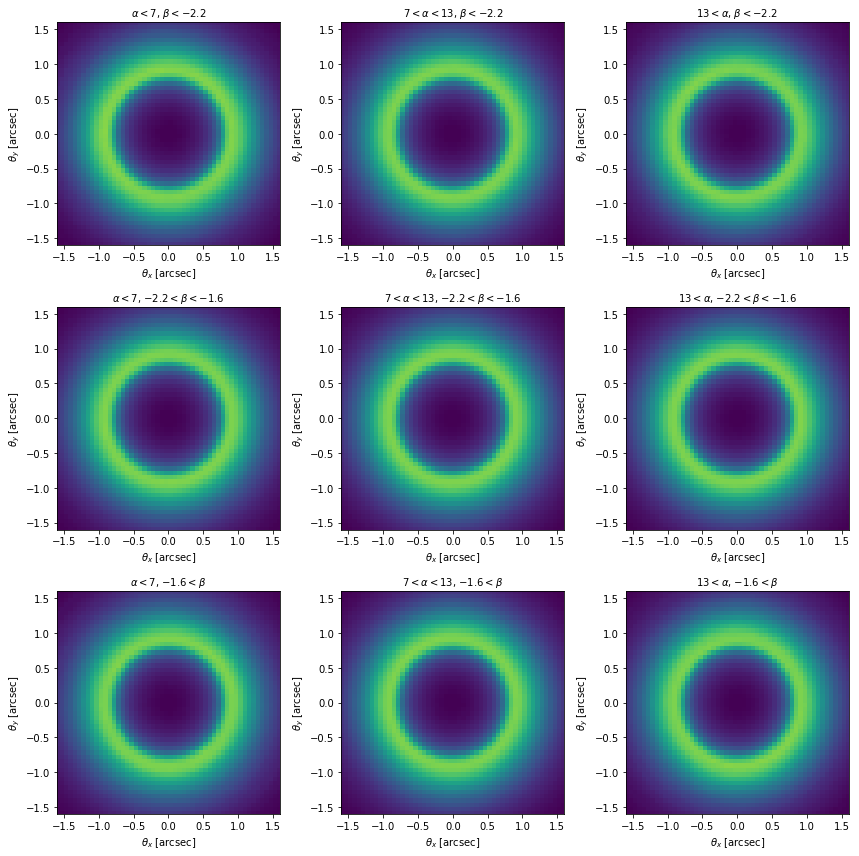

In [11]:
plt.figure(figsize=(12,12))

for i in range(3):
    for j in range(3):
        ax = plt.subplot(3, 3, j*3 + i + 1)
        
        plt.imshow(
            np.log10(avg_x_theta_check[i,j]),
            vmin=2.25,
            vmax=3.05,
            cmap='viridis',
            extent=(-2.,2.,-2.,2.),
            origin="lower"
        )
    
        plt.xlim(-1.6,1.6)
        plt.ylim(-1.6,1.6)
    
        plt.title(alpha_descr[i] + ", " + beta_descr[j],fontsize=10)
        plt.xlabel(r"$\theta_x$ [arcsec]")
        plt.ylabel(r"$\theta_y$ [arcsec]")
    
plt.tight_layout()
plt.show()
#plt.savefig("../figures/average_image_theta_check.pdf")

## Same for variance

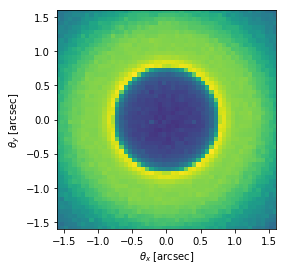

In [12]:
plt.figure(figsize=(4,4))
        
plt.imshow(
    std_x_prior/avg_x_prior,
    vmin=0.,
    vmax=1.5,
    cmap='viridis',
    extent=(-2.,2.,-2.,2.),
    origin="lower"
)

plt.xlim(-1.6,1.6)
plt.ylim(-1.6,1.6)

plt.xlabel(r"$\theta_x$ [arcsec]")
plt.ylabel(r"$\theta_y$ [arcsec]")

plt.tight_layout()
plt.savefig("../figures/std_image_prior.pdf")

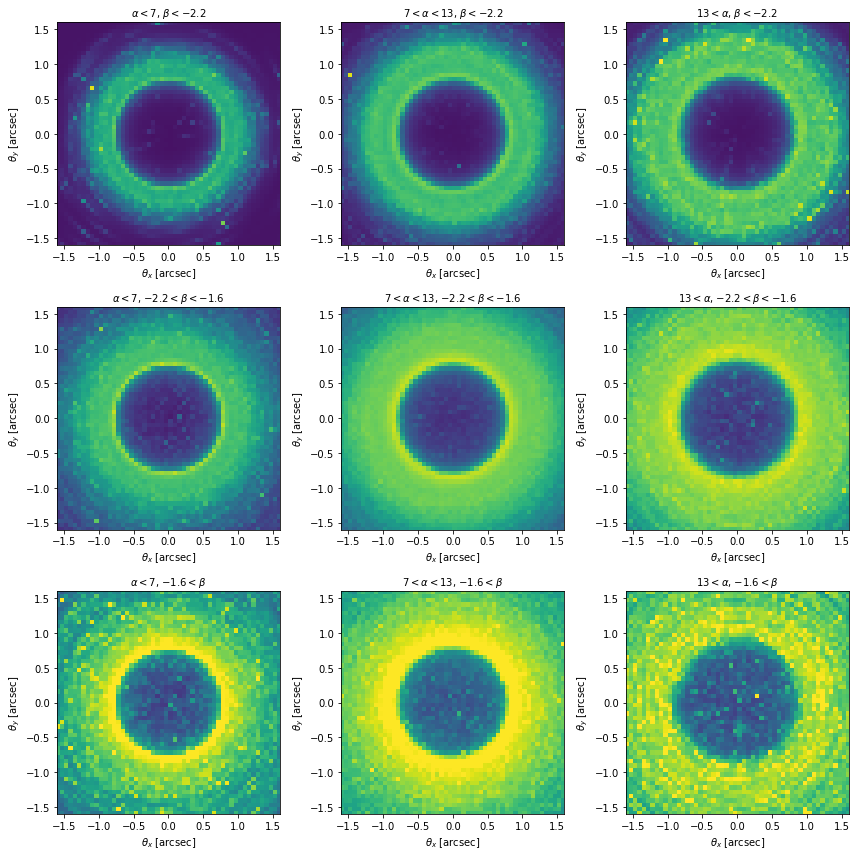

In [13]:
plt.figure(figsize=(12,12))

for i in range(3):
    for j in range(3):
        ax = plt.subplot(3, 3, j*3 + i + 1)
        
        plt.imshow(
            std_x_theta[i,j]/avg_x_theta[i,j],
            vmin=0.,
            vmax=1.5,
            cmap='viridis',
            extent=(-2.,2.,-2.,2.),
            origin="lower"
        )
    
        plt.xlim(-1.6,1.6)
        plt.ylim(-1.6,1.6)
    
        plt.title(alpha_descr[i] + ", " + beta_descr[j],fontsize=10)
        plt.xlabel(r"$\theta_x$ [arcsec]")
        plt.ylabel(r"$\theta_y$ [arcsec]")
    
plt.tight_layout()
plt.savefig("../figures/std_image_theta.pdf")